

# Project: No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.A number of characteristics about the patient are included in each row which will be analyzed by wrangling and exploring to get findings and results as shown. 

> Seems the main question about the main factors that affected on patients' showing up to their appointments.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

<a id='wrangling'></a>
# Data Wrangling



# Gather

- Load Data using pandas

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

# Assess

In [3]:
df.head()

PatientId  AppointmentID Gender          ScheduledDay  \
0   29872499824296        5642903      F  2016-04-29T18:38:08Z   
1  558997776694438        5642503      M  2016-04-29T16:08:27Z   
2    4262962299951        5642549      F  2016-04-29T16:19:04Z   
3     867951213174        5642828      F  2016-04-29T17:29:31Z   
4    8841186448183        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

In [4]:
df.tail()

PatientId  AppointmentID Gender          ScheduledDay  \
110522    2572134369293        5651768      F  2016-05-03T09:15:35Z   
110523    3596266328735        5650093      F  2016-05-03T07:27:33Z   
110524   15576631729893        5630692      F  2016-04-27T16:03:52Z   
110525   92134931435557        5630323      F  2016-04-27T15:09:23Z   
110526  377511518121127        5629448      F  2016-04-27T13:30:56Z   

              AppointmentDay  Age Neighbourhood  Scholarship  Hipertension  \
110522  2016-06-07T00:00:00Z   56   MARIA ORTIZ            0             0   
110523  2016-06-07T00:00:00Z   51   MARIA ORTIZ            0             0   
110524  2016-06-07T00:00:00Z   21   MARIA ORTIZ            0             0   
110525  2016-06-07T00:00:00Z   38   MARIA ORTIZ            0             0   
110526  2016-06-07T00:00:00Z   54   MARIA ORTIZ            0             0   

        Diabetes  Alcoholism  Handcap  SMS_received No-show  
110522         0           0        0             1      No  
110523         0           0        0             1      No  
110524         0           0        0             1      No  
110525         0           0        0             1      No  
110526         0           0        0             1      No

In [5]:
df.describe()

PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921800e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       4.000000   

        SMS_received  
count  110527.000000  
mean        0.321026  
std         0.466873  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null int64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: int64(9), object(5)
memory usage: 11.8+ MB


In [7]:
sum(df.duplicated())

0

In [8]:
df.Age.min()

-1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efff3a91588>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7efff3866f60>]], dtype=object)

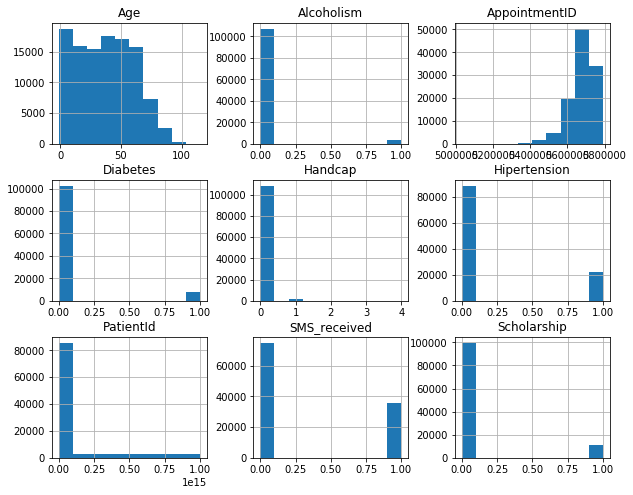

In [9]:
df.hist(figsize=(10,8))

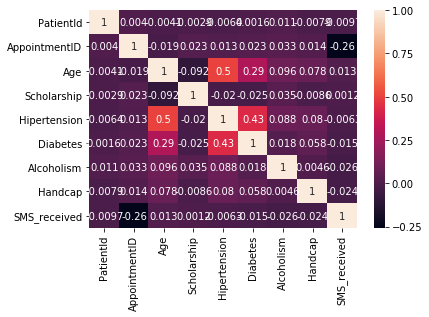

In [10]:
sns.heatmap(df.corr(), annot=True)

In [11]:
df.Age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
 56     1635
 38     1629
 59     1624
 2      1618
 50     1613
 57     1603
 36     1580
 51     1567
 19     1545
 39     1536
 37     1533
 54     1530
 34     1526
 33     1524
 30     1521
 6      1521
 3      1513
 17     1509
 32     1505
 5      1489
 44     1487
 18     1487
 58     1469
 46     1460
 45     1453
        ... 
 74      602
 76      571
 75      544
 78      541
 77      527
 80      511
 81      434
 82      392
 79      390
 84      311
 83      280
 85      275
 86      260
 87      184
 89      173
 88      126
 90      109
 92       86
 91       66
 93       53
 94       33
 95       24
 96       17
 97       11
 98        6
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [12]:
df.Age.mean()

37.088874211731067

In [13]:
df.Gender.value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [14]:
df.Scholarship.value_counts()

0    99666
1    10861
Name: Scholarship, dtype: int64

In [15]:
df.Hipertension.value_counts()

0    88726
1    21801
Name: Hipertension, dtype: int64

In [16]:
df.Diabetes.value_counts()

0    102584
1      7943
Name: Diabetes, dtype: int64

In [17]:
df.Alcoholism.value_counts()

0    107167
1      3360
Name: Alcoholism, dtype: int64

In [18]:
df.Handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [19]:
df.SMS_received.value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

In [20]:
df.Neighbourhood.value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
CENTRO                         3334
TABUAZEIRO                     3132
SANTA MARTHA                   3131
JESUS DE NAZARETH              2853
BONFIM                         2773
SANTO ANTÔNIO                  2746
SANTO ANDRÉ                    2571
CARATOÍRA                      2565
JABOUR                         2509
SÃO PEDRO                      2448
ILHA DO PRÍNCIPE               2266
NOVA PALESTINA                 2264
ANDORINHAS                     2262
DA PENHA                       2217
ROMÃO                          2215
GURIGICA                       2018
SÃO JOSÉ                       1977
BELA VISTA                     1907
MARUÍPE                        1902
FORTE SÃO JOÃO                 1889
ILHA DE SANTA MARIA            1885
SÃO CRISTÓVÃO                  1836
REDENÇÃO                    

## Data Cleaning

## Quality

##### `df` table

- `ScheduledDay` and `AppointmentDay` are datetime not a string.
- Replace minimum Age by '1' instead of '-1'.
- Replace Age 0 by the mean value.
- Rename columns Hipertension by Hypertension, Handcap by Handicap and No-show by No_show.
- Drop unneeded columns.

## Tidiness
- One variable in three columns in `df` table (diseases) includes (Hipertension, Diabetes, Alcoholism).

In [21]:
#take a copy from my data
df_clean = df.copy()

## Quality
### DataTypes

##### Define
Convert ScheduledDay and AppointmentDay columns' data type from string to datetime using `astype`.

##### Code

In [22]:
df_clean.ScheduledDay = pd.to_datetime(df_clean.ScheduledDay)
df_clean.AppointmentDay = pd.to_datetime(df_clean.AppointmentDay)

##### Test

In [23]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null int64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), int64(9), object(3)
memory usage: 11.8+ MB


## Quality
### Incorrect data

##### Define
Replace minimum Age by '1' instead of '-1' as it's not applicable.

##### Code

In [24]:
df_clean.Age = df_clean.Age.replace(df.Age.min(), '1')

##### Test

In [25]:
df_clean[df_clean.Age==-1]

Empty DataFrame
Columns: [PatientId, AppointmentID, Gender, ScheduledDay, AppointmentDay, Age, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received, No-show]
Index: []

##### Define
Replace 0 values in Age column by the mean value of age.

##### Code

In [26]:
#Return the data type of Age column to int

df_clean.Age = df_clean.Age.fillna(0.0).astype(int)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null int64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), int64(9), object(3)
memory usage: 11.8+ MB


In [27]:
df_clean.Age = df_clean.Age.replace(df_clean.Age.min(), df.Age.mean())

In [28]:
df_clean[df_clean.Age==0]
df_clean.Age = df_clean.Age.fillna(0.0).astype(int)

In [29]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null int64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), int64(9), object(3)
memory usage: 11.8+ MB


## Quality
### Columns name

##### Define
Rename Handcap and No-show columns by Handicap and No_show -in order- to can be applicable and more realty.

##### Code

In [30]:
df_clean.rename(columns={'Hipertension' : 'Hypertension', 'Handcap': 'Handicap', 'No-show': 'No_show'}, inplace=True)

##### Test

In [31]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null int64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
No_show           110527 non-null object
dtypes: datetime64[ns](2), int64(9), object(3)
memory usage: 11.8+ MB


In [32]:
df_clean.No_show.value_counts()

No     88208
Yes    22319
Name: No_show, dtype: int64

## Tidiness

- One variable in three columns in `df` table (diseases) includes (Hypertension, Diabetes, Alcoholism).

##### Code

In [ ]:
df_clean['diseases'] = df_clean[df_clean.columns[8:11]].apply(lambda x: ','.join(x.dropna().astype(str)),axis=1)
df_clean.diseases.value_counts()

##### Test

In [ ]:
df_clean.head()

<a id='eda'></a>
## Exploratory Data Analysis

> Statistics and visualization the findings

### Research Question: Factors to predict if a patient will Show up for his appointment

In [ ]:
#First, replace Yes and No by 1 and 0, in order, to get numeric values

df_clean.No_show = df_clean.No_show.replace('Yes', '1')
df_clean.No_show = df_clean.No_show.replace('No', '0')

In [ ]:
#Define absent and attend arrays

absent = df_clean.No_show == '1'
attend = df_clean.No_show == '0'

In [ ]:
#Convert the data type of No_show column to can particepate at heatmap

df_clean.No_show = df_clean.No_show.fillna(0.0).astype(int)

In [ ]:
#Detect the heatmap 

sns.heatmap(df_clean.corr(), annot=True)

In [ ]:
df_clean.describe()

In [ ]:
#Relation between patients' gender and not showing up to their appointment

df_clean.Gender[absent].hist(alpha = 0.5, label = 'Absent')
df_clean.Gender[attend].hist(alpha = 0.5, label = 'Attend')
plt.legend(title='Gender and No_Show')


**Most females were attending to their appointments unlike males who had higher percentage to be absent according their assigned number compared with females.**

In [ ]:
#Relation between enrolled patients in scholarship and not showing up to their appointment

df_clean.Scholarship[absent].hist(alpha = 0.5, label = 'Absent')
df_clean.Scholarship[attend].hist(alpha = 0.5, label = 'Attend')
plt.legend(title='Scholarship and No_Show')

**Most of attended patients didn’t enroll in scholarships.**

In [ ]:
df_clean.groupby('Scholarship').No_show.value_counts().plot(kind='pie',title='Scholarship and No_Show')

In [ ]:
#Seems to be a pretty strong association between receiving sms and no showing up to appointment

df_clean.groupby('SMS_received').No_show.value_counts().plot(kind='bar',title='SMS and No_Show')

**SMS received: the attended patients who didn’t receive SMS were more than who already received SMS and for the absent patients the most of them didn’t receive SMS**

In [ ]:
#The most persentage Absent patients were who received sms and enrolled in scholarship

df_clean.groupby(['SMS_received','Scholarship']).No_show.value_counts().plot(kind='bar',title='SMS, Scholarship and No_Show')

**So, by grouping by both SMS receiving and enrolling in scholarship, we can find that the higher percentage of attendance was for who didn’t receive SMS and didn’t enroll in scholarships, after them who just received SMS**

In [ ]:
#For SMS receiving and gender with showing up to appointments

df_clean.groupby(['SMS_received','Gender']).No_show.value_counts().plot(kind='bar',title='SMS, Gender and No_Show')

**And by grouping by SMS receiving and gender to detect the showing up**

In [ ]:
#Relation between patients have Diabetes and not showing up to their appointment

df_clean.Diabetes[absent].hist(alpha = 0.5, label = 'Absent')
df_clean.Diabetes[attend].hist(alpha = 0.5, label = 'Attend')
plt.legend(title='Diabetes and No_Show')

**Diabetes: most of attended patients didn’t have diabetes**

In [ ]:
#Relation between patients have Hipertension and not showing up to their appointment

df_clean.Hypertension[absent].hist(alpha = 0.5, label = 'Absent')
df_clean.Hypertension[attend].hist(alpha = 0.5, label = 'Attend')
plt.legend(title='Hypertension and No_Show')

**Hypertension: most of attended patients who didn’t have hypertension**

In [ ]:
#Patients who didn't have Hipertension, Diabetes and didn't Alcoholism were more attend

df_clean.groupby('diseases').No_show.value_counts().plot(kind= 'bar', title='Diseases and No_Show')

**So, most of attended patients didn’t have hypertension, diabetes and didn’t alcoholism**

In [ ]:
#Relation between handicap patients and not showing up to their appointment

df_clean.Handicap.value_counts().plot(kind= 'bar',alpha = 0.5, color='orange',label = 'Handicap')
df_clean.No_show.value_counts().plot(kind= 'bar',alpha = 0.5, color='blue',label = 'No_Show')
plt.legend(title='Handicaps and No_Show')

In [ ]:
#More details about the relation between handicap levels and being absent to appointments

df_clean.groupby('Handicap').No_show.value_counts().plot(kind='bar', title='Handicaps and No_Show')

**Patients didn’t have any level of handicaps were more highly attend and a bite of absent patients were handicapped**

In [ ]:
df_clean.groupby(['diseases','Handicap']).No_show.value_counts().plot(kind= 'line', title='No_Show')

**As shown, the higher attended patients who didn't have the mentioned diseases and no handicaps, so we can strongly predict from those factors first.**

<a id='conclusions'></a>
# Conclusions

> **After pervious analysis we can find that some of important factors to predict if the patients will show up to their appointments:**

>**Gender** as females appeared more committed than males, **SMS receiving** and **Scholarships** aren’t big deals as even the most percentage of attending patient were who didn’t received SMS or enroll in scholarship but they are still factors to make the showing up patients more as they linear proportional with patient attendance, about mention diseases like **Hypertension**, **Diabetes** and **Alcoholism** they are linear proportional too with showing up as the most percentage of attendance was for who didn’t have any of those diseases and for **handicapped** patients by any levels were the most absent percentages unlike those who didn’t have handicap were more highly attend.

>Dataset **flaws** mainly appeared of its **size** as it too large to work with and according to **Neighbourhood** column, for example, was too vary widely to be deal with each area. In addition to  quality issues like **missing data**, some wrong spelling columns' name and tidiness issues like separating mentioned diseases (DiabetesHypertension and Alcoholism) to many columns

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])